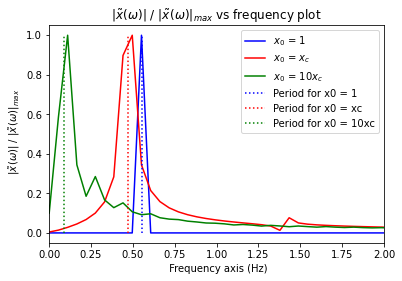

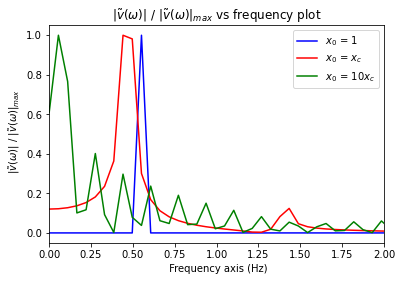

In [1]:
# Question 2 a)
# Author: Ilyas Sharif, Spencer Ki


# Please be patient running the code, it takes around 20 seconds to run due to my selected time step.
# Apologies for my poorly optimized code.

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft


# Defining constants
k = 12.
m = 1.
w = np.sqrt(k/m)
T = 2*np.pi*np.sqrt(m/k)
c = 3.0e8
dt = T/100000


# Defining time array and creating position and velocity arrays
# Inititalizing the position and velocity arrays
N = int((10*T)/dt)
t = np.linspace(0, 10*T, N)

# The subscript _1 or _cw or _10cw represents the initial conditions
x_1 = 0.0*t
x_cw = 0.0*t
x_10cw = 0.0*t
v_1 = 0.0*t
v_cw = 0.0*t
v_10cw = 0.0*t
x_1[0] = 1
x_cw[0] = c/w
x_10cw[0] = 10*c/w
v_1[0] = 0.  
v_cw[0] = 0.  
v_10cw[0] = 0.  


# Defining the acceleration due to relativistic spring
def acceleration(u1,u2):
    a = -(k/m)*u1*(1 - (u2**2)/(c**2))**(3/2)
    return a

for i in range(N-1):
    # for initial condition 1
    v_1[i+1] = v_1[i] + dt*acceleration(x_1[i],v_1[i])
    x_1[i+1] = x_1[i] + dt*v_1[i+1]
    
    # for initial condition c/w
    v_cw[i+1] = v_cw[i] + dt*acceleration(x_cw[i],v_cw[i])
    x_cw[i+1] = x_cw[i] + dt*v_cw[i+1]
    
    # for initial condition 10*c/w
    v_10cw[i+1] = v_10cw[i] + dt*acceleration(x_10cw[i],v_10cw[i])
    x_10cw[i+1] = x_10cw[i] + dt*v_10cw[i+1]
    
    
# Calculating the Fourier Transform for position and velocity for each initial condition
# f_x , f_v are the fourier transforms. _1, _cw, _10cw are the initial conditions
f_x_1 = np.fft.fftshift((np.fft.fft(x_1)))
f_x_cw = np.fft.fftshift((np.fft.fft(x_cw)))
f_x_10cw = np.fft.fftshift((np.fft.fft(x_10cw)))

f_v_1 = np.fft.fftshift(np.fft.fft(v_1))
f_v_cw = np.fft.fftshift(np.fft.fft(v_cw))
f_v_10cw = np.fft.fftshift(np.fft.fft(v_10cw))


# Calculating absolute value of each the position and velocity fourier transforms and calculating their maximum
f_x_1 = np.abs(f_x_1)
f_x_cw = np.abs(f_x_cw)
f_x_10cw = np.abs(f_x_10cw)

f_v_1 = np.abs(f_v_1)
f_v_cw = np.abs(f_v_cw)
f_v_10cw = np.abs(f_v_10cw)

max_f_x_1 = np.max(f_x_1)
max_f_x_cw = np.max(f_x_cw)
max_f_x_10cw = np.max(f_x_10cw)

max_f_v_1 = np.max(f_v_1)
max_f_v_cw = np.max(f_v_cw)
max_f_v_10cw = np.max(f_v_10cw)


# Calculating |x(w)| / |x(w)|max and |v(w)| / |v(w)|max
f_x_1 = f_x_1 / max_f_x_1
f_x_cw = f_x_cw / max_f_x_cw
f_x_10cw = f_x_10cw / max_f_x_10cw

f_v_1 = f_v_1 / max_f_v_1
f_v_cw = f_v_cw / max_f_v_cw
f_v_10cw = f_v_10cw / max_f_v_10cw


# Calculating the angular frequency axis
# Note: angular frequency w = 2πf
f = np.fft.fftshift((np.fft.fftfreq(len(x_1), dt)))

# Calculating the 1/T using Lab 3 results for T
# From Lab 3 we know the following periods
T1 = 1.810253652003714 #Period for x0 = 1
T2 = 2.133084618793645 #Period for x0 ~ xc
T3 = 11.660887636522721 #Period for x0 ~ 10xc


plt.plot(f,f_x_1, color = 'b', label = "$x_0$ = 1")
plt.plot(f,f_x_cw, color = 'r', label = "$x_0$ = $x_c$")
plt.plot(f,f_x_10cw, color = 'g', label = "$x_0$ = $10x_c$")
plt.xlim(0,2)

plt.plot([1/T1, 1/T1], [0,1], linestyle = ':', color = 'b', label = "Period for x0 = 1")
plt.plot([1/T2, 1/T2], [0,1], linestyle = ':', color = 'r', label = "Period for x0 = xc")
plt.plot([1/T3, 1/T3], [0,1], linestyle = ':', color = 'g', label = "Period for x0 = 10xc")
plt.xlabel(" Frequency axis (Hz)")
plt.ylabel("  |$\~x(\omega)$| / |$\~x(\omega) $|$_{max}$ ")
plt.title("|$\~x(\omega)$| / |$\~x(\omega) $|$_{max}$ vs frequency plot ")
plt.legend()
plt.show()

plt.plot(f,f_v_1, color = 'b', label = "$x_0$ = 1")
plt.plot(f,f_v_cw, color = 'r', label = "$x_0$ = $x_c$")
plt.plot(f,f_v_10cw, color = 'g', label = "$x_0$ = $10x_c$")
plt.xlabel(" Frequency axis (Hz)")
plt.ylabel("  |$\~v(\omega)$| / |$\~v(\omega) $|$_{max}$ ")
plt.title("|$\~v(\omega)$| / |$\~v(\omega) $|$_{max}$ vs frequency plot ")
plt.xlim(0,2)
plt.legend()

# note: we had to approximate x0 ~ xc and x0~10xc just because we used the solutions code and it didn't explicity 
# calculate for these values hence why we're off a bit for those. the first one is bang on though.